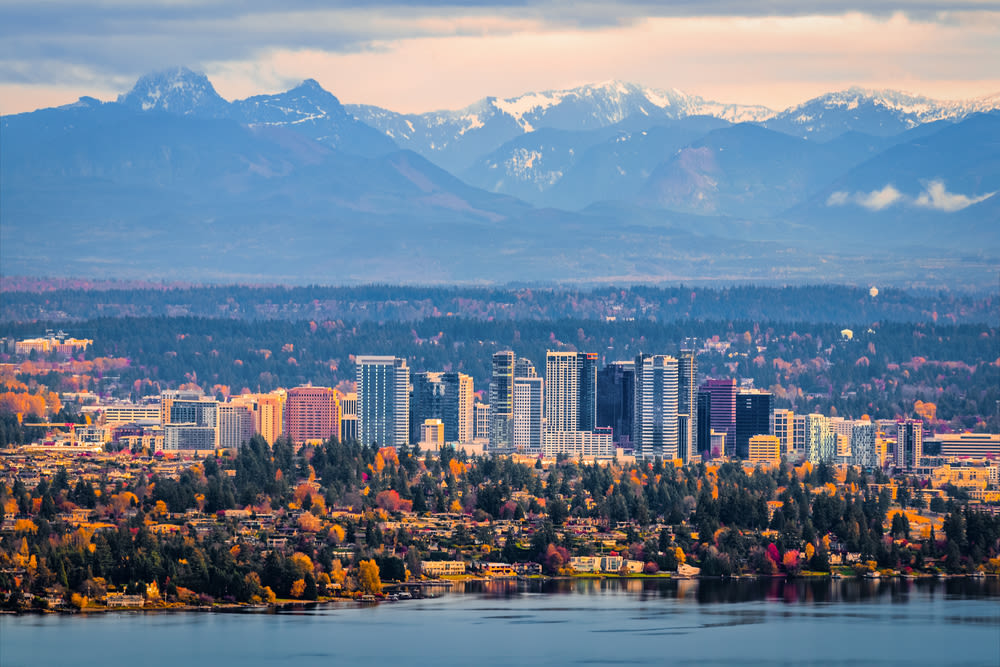

# MULTIPLE LINEAR REGRESSION MODELLING TO ANALYZE HOUSE SALES IN KING COUNTY, WASHINGTON


## Final Project Submission

Please fill out:
* Student name: 
    Allan kiplagat,
    Elizabeth masai,
    Evaclaire wamitu,
    Julius njeri        - juliusczar36@gmail.com,
    Joan Nyamache       - kerubonyamache@gmail.com,
    Mitch mathiu,
    Mourine kitili,
    Kelvin mwaura,
    Samuel Wanga        - samabu1996@gmail.com,

* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Asha Deen , Lucille Kaleha
* Blog post URL:


## 1.0 BUSINESS UNDERSTANDING

The primary goal of the client is to create a platform that delivers accurate estimates of house prices which are crucial for both buyers and sellers in King county. To achieve this objective we need to develop a model that can identify the key factors influencing house prices. To effectively train this model the client requires precise and representative data related to the real estate market in king county, including historical sales, current listings, property size, and other relevant features.
Once trained successfully the model will be capable of providing accurate estimations of house values based on their features.
The expectation is that, once completed, the model can be used by them as a tool in selecting properties for investment in King County.


### Analysis Questions

This analysis will seek to answer three questions about the data:

Question 1: Which features are most highly correlated with price?

Question 2: Which features have the strongest correlations with other predictor variables?

Question 3: What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

## 2.0 DATA UNDERSTANDING

The dataset contains 21 columns. One is of the prices of the houses, which is our target variable, and the rest will be used to make our predictions. The column names and their descriptions are as follows:
id - unique identified for a house
dateDate - house was sold
pricePrice - is prediction target
bedroomsNumber - of Bedrooms/House
bathroomsNumber - of bathrooms/bedrooms
sqft_livingsquare - footage of the home
sqft_lotsquare - footage of the lot
floorsTotal - floors (levels) in house
waterfront - House which has a view to a waterfront
view - Has been viewed
condition - How good the condition is ( Overall )
grade - overall grade given to the housing unit, based on King County grading system
sqft_above - square footage of house apart from basement
sqft_basement - square footage of the basement
yr_built - Built Year
yr_renovated - Year when house was renovated
zipcode - zip
lat - Latitude coordinate
long - Longitude coordinate
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 3.0 DATA PREPARATION

3.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

In [2]:
#Loading the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

The dataset has 21597 entries and 20 columns. Most of the columns consist of numerical data which make it suitable for linear regression analysis. 

In [6]:
# Checked the number of unique values for each column
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

# 4.0 DATA CLEANING

Check for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data

Missing Values

In [7]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [8]:
#Drop the id and date column since there is no use for it


#df.drop(["id", "date"], axis= 1, inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
# check the total number of null values in each column
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns waterfront, view and yr_renovated have 2376, 63 and 3842 null values respectively Lets look it further

In [11]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [12]:
# Replace the null values
df['waterfront'].fillna('NO', inplace= True)
df.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [13]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [14]:
# Replace the null values
df['view'].fillna('NONE', inplace= True)
df.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [15]:
df.dropna(subset=['yr_renovated'])

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
...           ...         ...        ...       ...        ...          ...   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21595   291310100   1/16/2015   400000.0         3       2.50         1600   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...         grade sqft_above  \
0          5650     1.0         NO  NONE  ...     7 Average       1180   
1          7242     2.0         NO  NONE  ...     7 Average       2170   
3          5000     1.0         NO  NONE  ...     7 Average       1050   
4          8080     1.0         NO  NONE  ...        8 Good       1680   
5        101930     1.0         NO  NONE  ...  11 Excellent       3890   
...         ...     ...        ...   ...  ...           ...        ...   
21592      1131     3.0         NO  NONE  ...        8 Good       1530   
21593      5813     2.0         NO  NONE  ...        8 Good       2310   
21594      1350     2.0         NO  NONE  ...     7 Average       1020   
21595      2388     2.0         NO  NONE  ...        8 Good       1600   
21596      1076     2.0         NO  NONE  ...     7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
5             1530.0     2001           0.0    98053  47.6561 -122.005   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
3               1360        5000  
4               1800        7503  
5               4760      101930  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[17755 rows x 21 columns]

In [16]:
# Fill missing values in the 'yr_renovated' column with 'NO'
df['yr_renovated'].fillna('NO', inplace= True)
df.yr_renovated.value_counts()

0.0       17011
NO         3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1971.0        1
1944.0        1
1934.0        1
1976.0        1
1959.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [17]:
#counter checking to see if there are any more missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 As evident from the previous section, the data has been thoroughly processed and is now prepared for analysis and other tasks.
 All missing values were replaced successfully.

Conversion of Date Column and Creation of New Columns

The date column represents the month and year the houses were sold. Creating new columns yr_sold and month_sold from this column will make analyzing the data easier and then dropping it since it will not be useful anymore.

In [18]:
# split the date into month, day and year
date = df['date'].str.split('/', expand=True)

# create new columns for month and year and convert to integer
df['month_sold'] = date[0].astype(int)
df['yr_sold'] = date[2].astype(int)

# drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

# check to see if changed were made
df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ... sqft_basement  yr_built yr_renovated  \
0         NO  NONE    Average  ...           0.0      1955            0   
1         NO  NONE    Average  ...         400.0      1951         1991   
2         NO  NONE    Average  ...           0.0      1933           NO   
3         NO  NONE  Very Good  ...         910.0      1965            0   
4         NO  NONE    Average  ...           0.0      1987            0   

   zipcode      lat     long  sqft_living15  sqft_lot15  month_sold  yr_sold  
0    98178  47.5112 -122.257           1340        5650          10     2014  
1    98125  47.7210 -122.319           1690        7639          12     2014  
2    98028  47.7379 -122.233           2720        8062           2     2015  
3    98136  47.5208 -122.393           1360        5000          12     2014  
4    98074  47.6168 -122.045           1800        7503           2     2015  

[5 rows x 22 columns]

Lets to create a new column age to represent the age of the houses. To get the age of the house, I got the difference between the yr_built and the year 2015

In [19]:
# create new column 'age'
df['age'] = 2015 - df['yr_built']

# drop the column for yr_built since it's not longer useful
df.drop(columns=['yr_built'], axis=1, inplace=True)

# check to see if changes were made
df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018  360000.0         3       2.50         1530      1131   
21593  6600060120  400000.0         4       2.50         2310      5813   
21594  1523300141  402101.0         2       0.75         1020      1350   
21595   291310100  400000.0         3       2.50         1600      2388   
21596  1523300157  325000.0         2       0.75         1020      1076   

       floors waterfront  view  condition  ... sqft_basement  yr_renovated  \
0         1.0         NO  NONE    Average  ...           0.0             0   
1         2.0         NO  NONE    Average  ...         400.0          1991   
2         1.0         NO  NONE    Average  ...           0.0            NO   
3         1.0         NO  NONE  Very Good  ...         910.0             0   
4         1.0         NO  NONE    Average  ...           0.0             0   
...       ...        ...   ...        ...  ...           ...           ...   
21592     3.0         NO  NONE    Average  ...           0.0             0   
21593     2.0         NO  NONE    Average  ...           0.0             0   
21594     2.0         NO  NONE    Average  ...           0.0             0   
21595     2.0         NO  NONE    Average  ...           0.0             0   
21596     2.0         NO  NONE    Average  ...           0.0             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  month_sold  \
0       98178  47.5112 -122.257           1340        5650          10   
1       98125  47.7210 -122.319           1690        7639          12   
2       98028  47.7379 -122.233           2720        8062           2   
3       98136  47.5208 -122.393           1360        5000          12   
4       98074  47.6168 -122.045           1800        7503           2   
...       ...      ...      ...            ...         ...         ...   
21592   98103  47.6993 -122.346           1530        1509           5   
21593   98146  47.5107 -122.362           1830        7200           2   
21594   98144  47.5944 -122.299           1020        2007           6   
21595   98027  47.5345 -122.069           1410        1287           1   
21596   98144  47.5941 -122.299           1020        1357          10   

       yr_sold  age  
0         2014   60  
1         2014   64  
2         2015   82  
3         2014   50  
4         2015   28  
...        ...  ...  
21592     2014    6  
21593     2015    1  
21594     2014    6  
21595     2015   11  
21596     2014    7  

[21597 rows x 22 columns]

The data has been cleaned successfully.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_renovated   21597 non-null  object 
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

# 5.0 DATA VISUALIZATION

Prior to the modeling process, we needed to create visualizations in order to analyse some of the trends in the data.

We created a correlation matrix in order to identify highly correlated variables in the data.

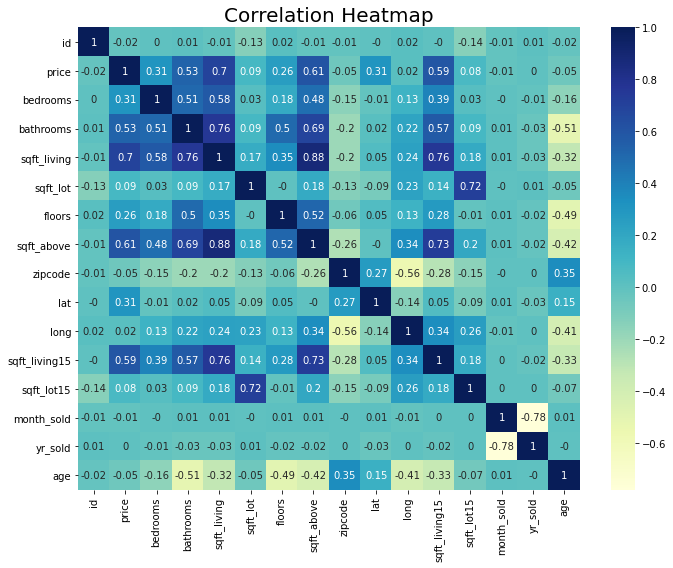

In [21]:
# creating a correlation matrix
correlation_matrix = df.corr()
rounded_corr_matrix = np.round(correlation_matrix, 2)

# plotting correlation matrix heatmap and displaying correlation coefficients within the plot using annot
plt.figure(figsize=(10,8))
sns.heatmap(rounded_corr_matrix, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap', fontsize=20)

# Adjusting the layout of the plot for better visualization
plt.tight_layout();

# saving figure
#plt.savefig('./fig1.png');

From the heatmap above, we could see that there are relatively strong positive correlations between price and sqft_living at 0.7, sqft_above at 0.61, sqft_living15 at 0.59 and number of bathrooms at 0.53.

The weakest positive correlations were between price and number of bedrooms at 0.31, sqft_lot at 0.09, number of floors at 0.26 and sqft_lot15 at 0.08.

The weakest inverse correlations were between price and zipcode and age at -0.05, and month sold at -0.01.





Next we wanted to investigate house price trends over the year and over the specific months/seasons.

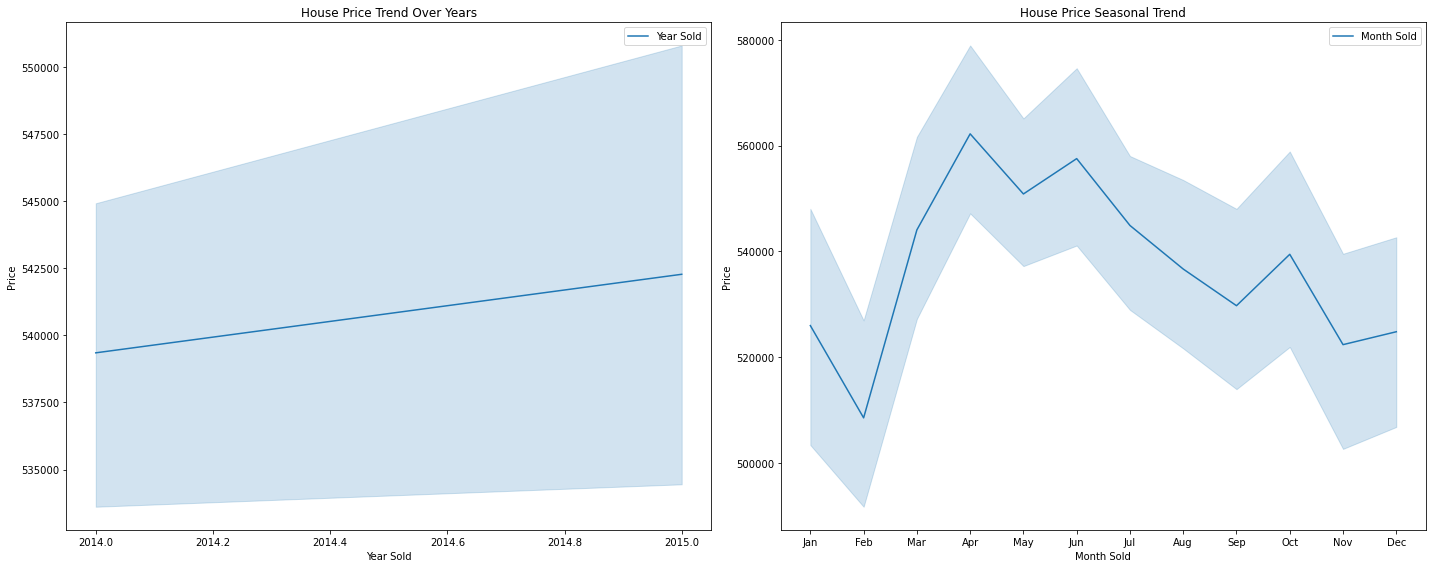

In [22]:
# Creating a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting price vs. yr_sold and price vs. month_sold on  same axes
for i, (x_col, title, xlabel) in enumerate([('yr_sold', 'House Price Trend Over Years', 'Year Sold'),
                                            ('month_sold', 'House Price Seasonal Trend', 'Month Sold')]):
    sns.lineplot(x=x_col, y='price', data=df, ax=axes[i], label=xlabel)
    axes[i].set_title(title)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel('Price')
    if x_col == 'month_sold':
        axes[i].set_xticks(range(1, 13))
        axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjusting the layout of the subplots for better visualization
plt.tight_layout();

# saving figure
#plt.savefig('./fig2.png');

We can clearly see that house prices were on a steady rise from 2014 to 2015 with the highest house prices recorded in the month of April and the lowest in the month of February. Investigations are required to find out why house prices drastically rose between February and April and why prices fell between June and September.

The next step was to explore the distributions of the variables with the strongest positive relationships with price.

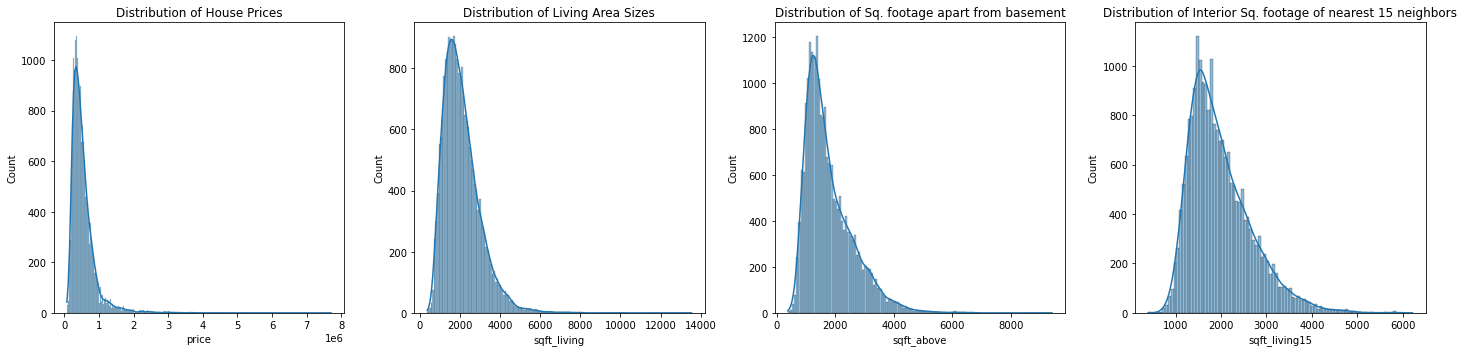

In [23]:
# Creating a figure with 1 row and 4 columns of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Defining the variables and titles for the histograms
variables = ['price', 'sqft_living', 'sqft_above', 'sqft_living15']
titles = ['House Prices', 'Living Area Sizes', 'Sq. footage apart from basement', 'Interior Sq. footage of nearest 15 neighbors']

# Iterating over the variables and titles to create histograms
for i, var in enumerate(variables):
    # Plot the histogram for the current variable
    sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    
    # Setting the title for the current subplot based on the corresponding title
    axes[i].set_title(f'Distribution of {titles[i]}')
    
# Adjusting the layout of the subplots for better visualization
plt.tight_layout();

# saving figure
#plt.savefig('./fig3.png');

From the histograms above we can infer that our variables follow a normal distribution with skewness and kurtosis in all the distributions. This will help inform further analysis and decision-making.

Below we analyzed the variation of average house prices as per the overall condition of a house, whether a house is located on a waterfront or not, the quality of views from the house and the number of floors/ levels in a house.

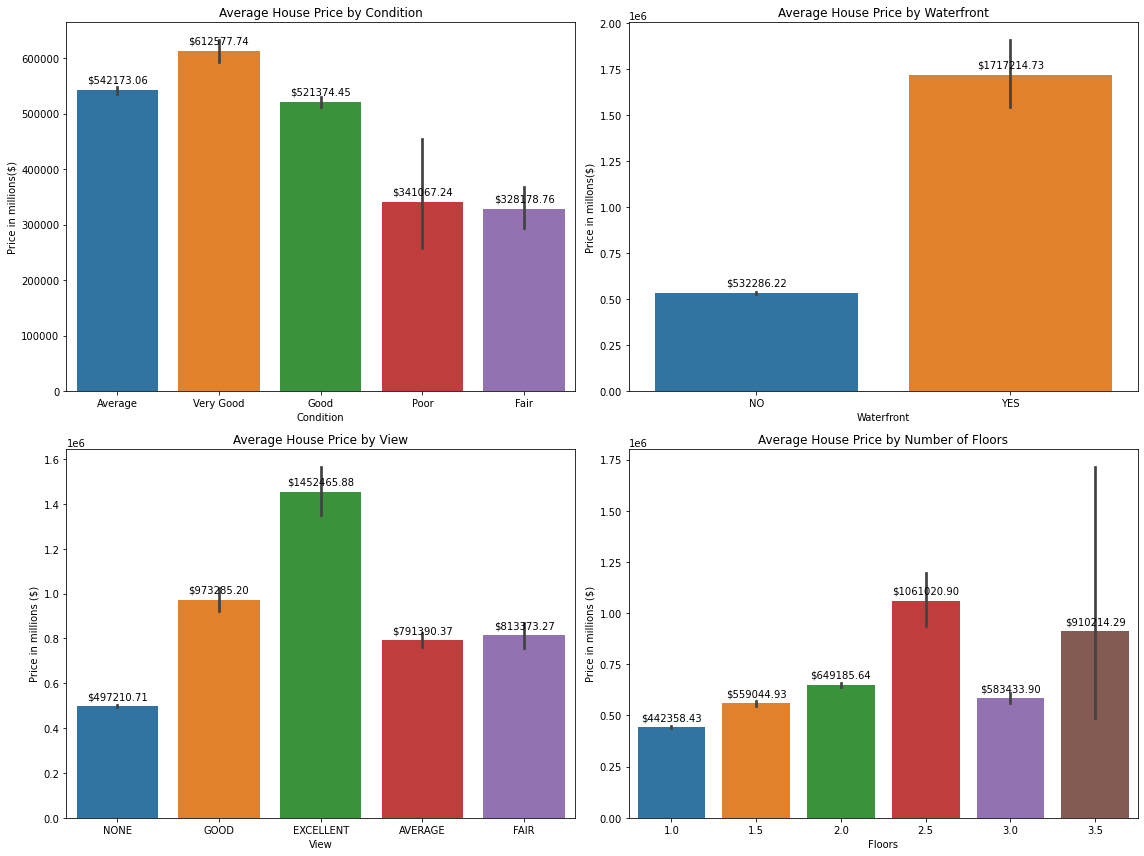

In [24]:
# Defining the plots to be created
plots = [
    ('Average House Price by Condition', 'condition', 'Price in millions($)'),
    ('Average House Price by Waterfront', 'waterfront', 'Price in millons($)'),
    ('Average House Price by View', 'view', 'Price in millions ($)'),
    ('Average House Price by Number of Floors', 'floors', 'Price in millions ($)'),
]

# Creating a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Iterating over the plots and create bar plots for each
for i, (title, x_col, y_col) in enumerate(plots):
    # Create a bar plot for the current plot
    sns.barplot(x=x_col, y='price', data=df, ax=axes[i], edgecolor='none')
    
    # Adding annotations for the price values on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
    # Setting the title, x-axis label, and y-axis label for the current subplot
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col.capitalize())
    axes[i].set_ylabel(y_col)
    
# Adjusting the layout of the subplots for better visualization
plt.tight_layout();

# saving figure
#plt.savefig('./fig4.png');

Next was to analyze the distribution of average house prices per zipcode.

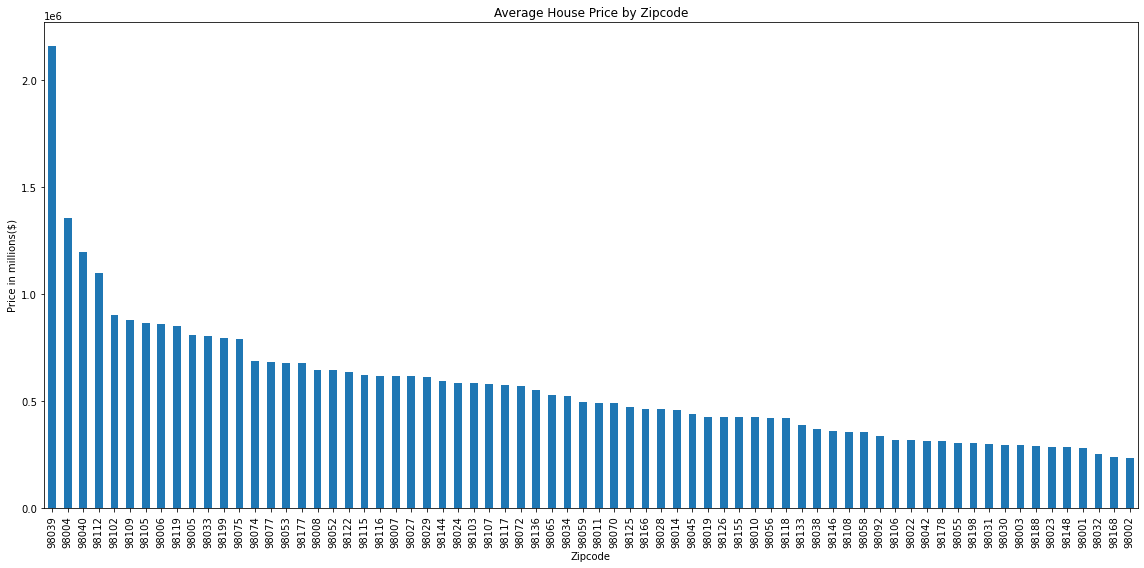

In [25]:
# Creating a figure with a single subplot
fig, ax = plt.subplots(figsize=(16, 8))

# Grouping the data by zipcode, calculating mean price for each zipcode & sorting by mean price in descending order
price_by_zipcode = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Creating a bar plot of the average price per zipcode
price_by_zipcode.plot(kind='bar', ax=ax)

# Setting the title, x-axis label, and y-axis label for the plot
ax.set_title('Average House Price by Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price in millions($)')

# Rotating the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Adjusting the layout for better visualization
plt.tight_layout();

# saving figure
#plt.savefig('./fig5.png');

From the above plot we can see that houses in Medina City (zipcode 98039) have the highest average prices while houses in Auburn City (zipcode 98002) have the lowest average prices. The next step was to assess the change in house price values as per the grade, condition and waterfront location of a house with and without outliers using box plots as shown below.

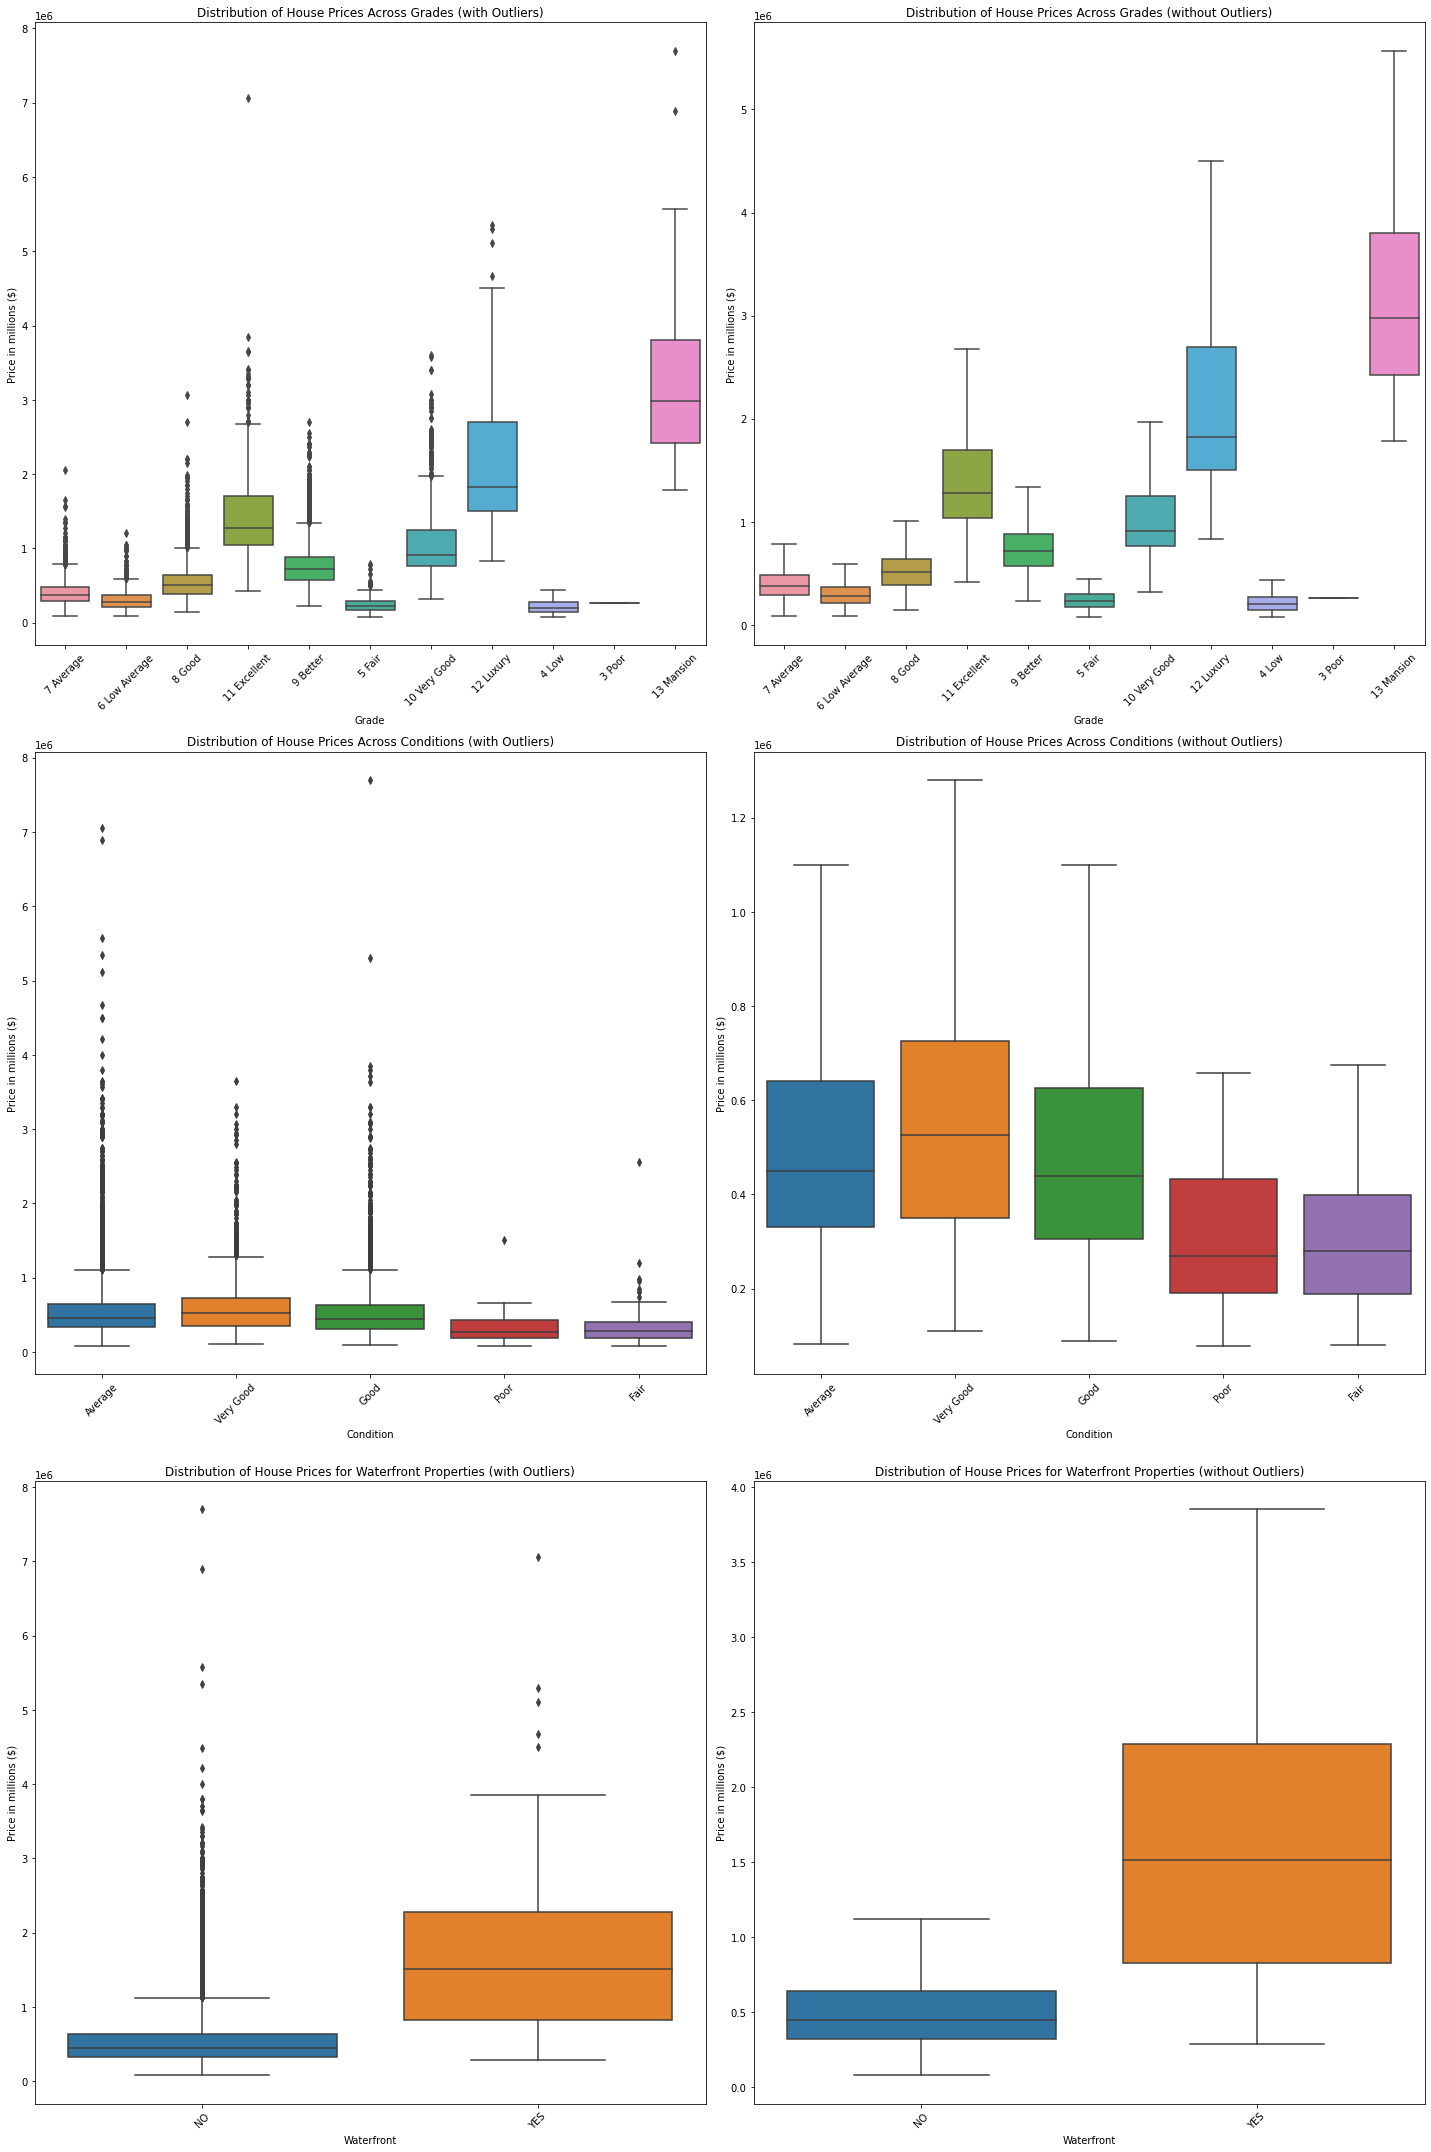

In [26]:
# Defining the features and titles for the boxplots
features = [
    ('grade', 'Distribution of House Prices Across Grades'),
    ('condition', 'Distribution of House Prices Across Conditions'),
    ('waterfront', 'Distribution of House Prices for Waterfront Properties')
]

# Creating a figure with multiple subplots
fig, axes = plt.subplots(len(features), 2, figsize=(20, 30))

# Iterating over the features and titles to create boxplots
for i, (feature, title) in enumerate(features):
    # Creating boxplots with outliers
    sns.boxplot(x=feature, y='price', data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f"{title} (with Outliers)")
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Creating boxplots without outliers
    sns.boxplot(x=feature, y='price', data=df, ax=axes[i, 1], showfliers=False)
    axes[i, 1].set_title(f"{title} (without Outliers)")
    axes[i, 1].tick_params(axis='x', rotation=45)

    # Setting x-axis and y-axis labels for both subplots
    axes[i, 0].set_xlabel(feature.capitalize())
    axes[i, 0].set_ylabel('Price in millions ($)')
    axes[i, 1].set_xlabel(feature.capitalize())
    axes[i, 1].set_ylabel('Price in millions ($)')
    
# Adjusting the layout of the subplots for better visualization
plt.tight_layout();

# saving figure
#plt.savefig('./fig6.png');

We can see that the median house prices increased when outliers were removed from the data. We can therefore conclude that house prices in King County were affected by outliers to a certain extent. 

We then created a grid of scatterplots to visualise and better explore the relationships between multiple variables listed below. This allowed us to infer which variables showed linear relationships with one another.

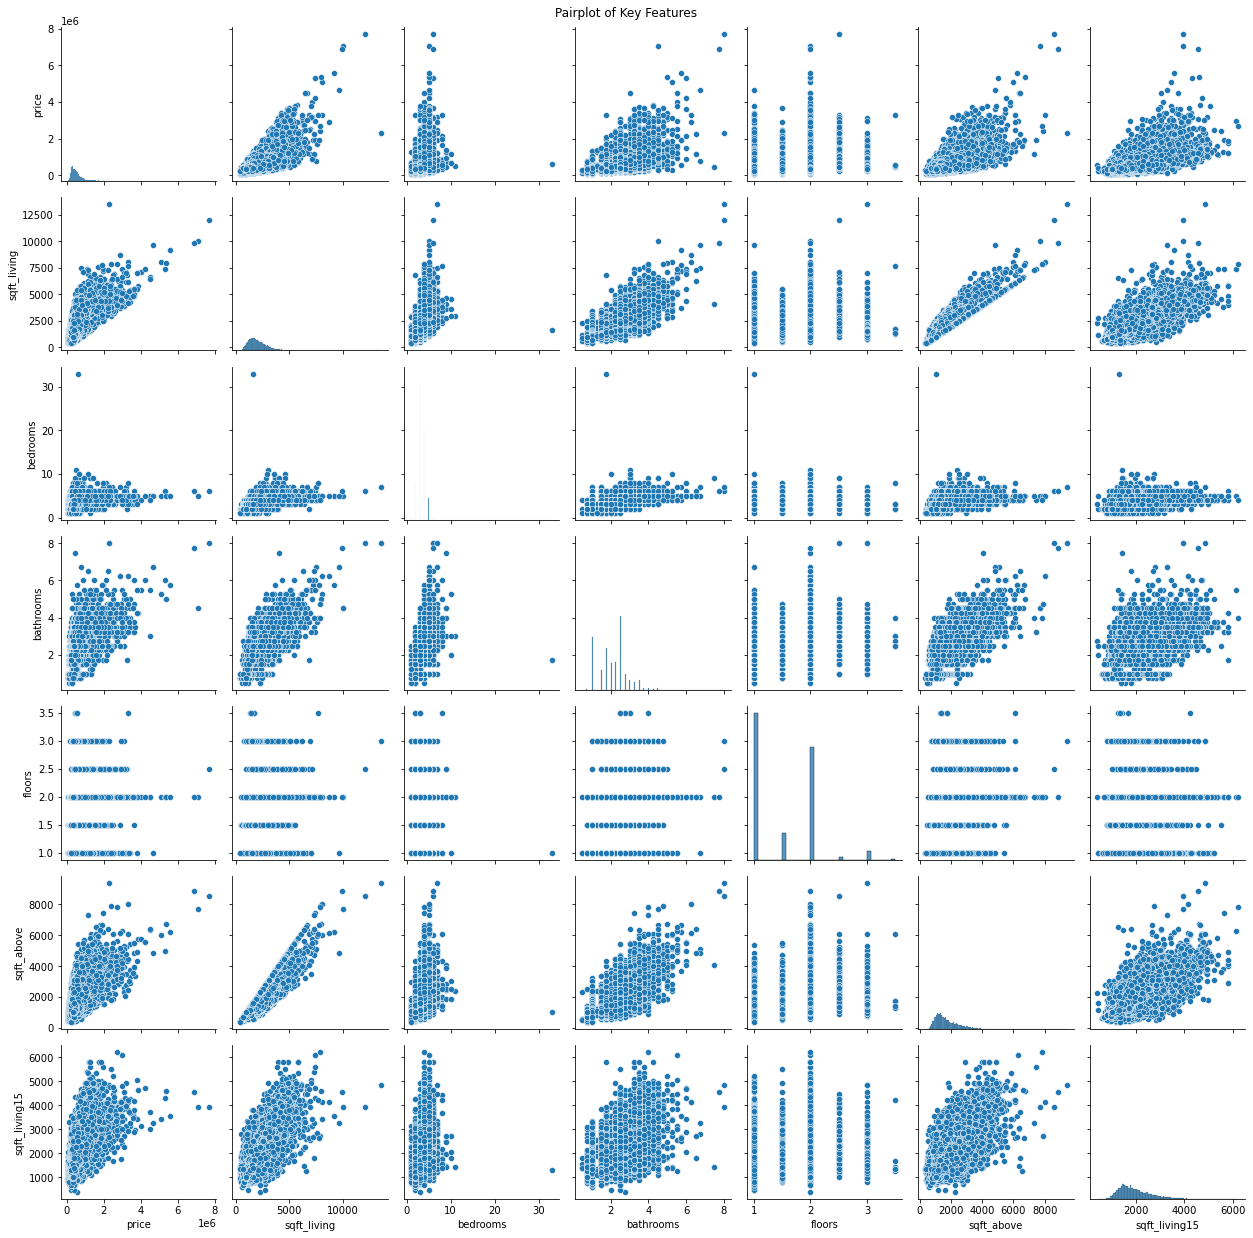

In [27]:
# Defining the variables for the scatter plot matrix
scatter_vars = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_living15']

# Creating a pairplot for the selected variables
sns.pairplot(df[scatter_vars], kind='scatter', diag_kind='hist')

# Setting the overall title for the pairplot
plt.suptitle('Pairplot of Key Features')

# Adjusting the layout of the subplots for better visualization
plt.tight_layout();

# saving figure
#plt.savefig('./fig7.png');

Lastly, we created an interactive map to showcase our study area, King County, and the distribution of house prices per zipcode.

In [28]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on the average latitude and longitude
map_center = [df['lat'].mean(), df['long'].mean()]
map_zoom = 10
m = folium.Map(location=map_center, zoom_start=map_zoom)

# Add a GeoJSON layer for the boundaries
folium.GeoJson('data/zipcode_kc.geojson', name='geojson').add_to(m)

# Creating a Choropleth map color-coded by house prices
# Red represents higher priced houses
# Yellow represents lower priced houses 
folium.Choropleth(
    geo_data='data/zipcode_kc.geojson',
    data=df,
    columns=['zipcode', 'price'],
    key_on='feature.properties.ZIP',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='House Prices'
).add_to(m)

# Adding markers to make the map more interactive by showing house prices per zipcode
marker_cluster = MarkerCluster().add_to(m)
for i in range(df.shape[0]):
    location = [df['lat'][i], df['long'][i]]
    tooltip = f"Zipcode: {df['zipcode'][i]}"
    folium.Marker(
        location,
        popup=f"Sales price: ${round(df['price'][i], 2)}",
        tooltip=tooltip
    ).add_to(marker_cluster)


# saving map to a HTML file
# m.save('./my_map.html')

# Displaying the map    
#m

In order to view the map created above, please download the notebook and uncomment the 'm' at the bottom of the code as map will not display on Github. Below is a preview of the map:

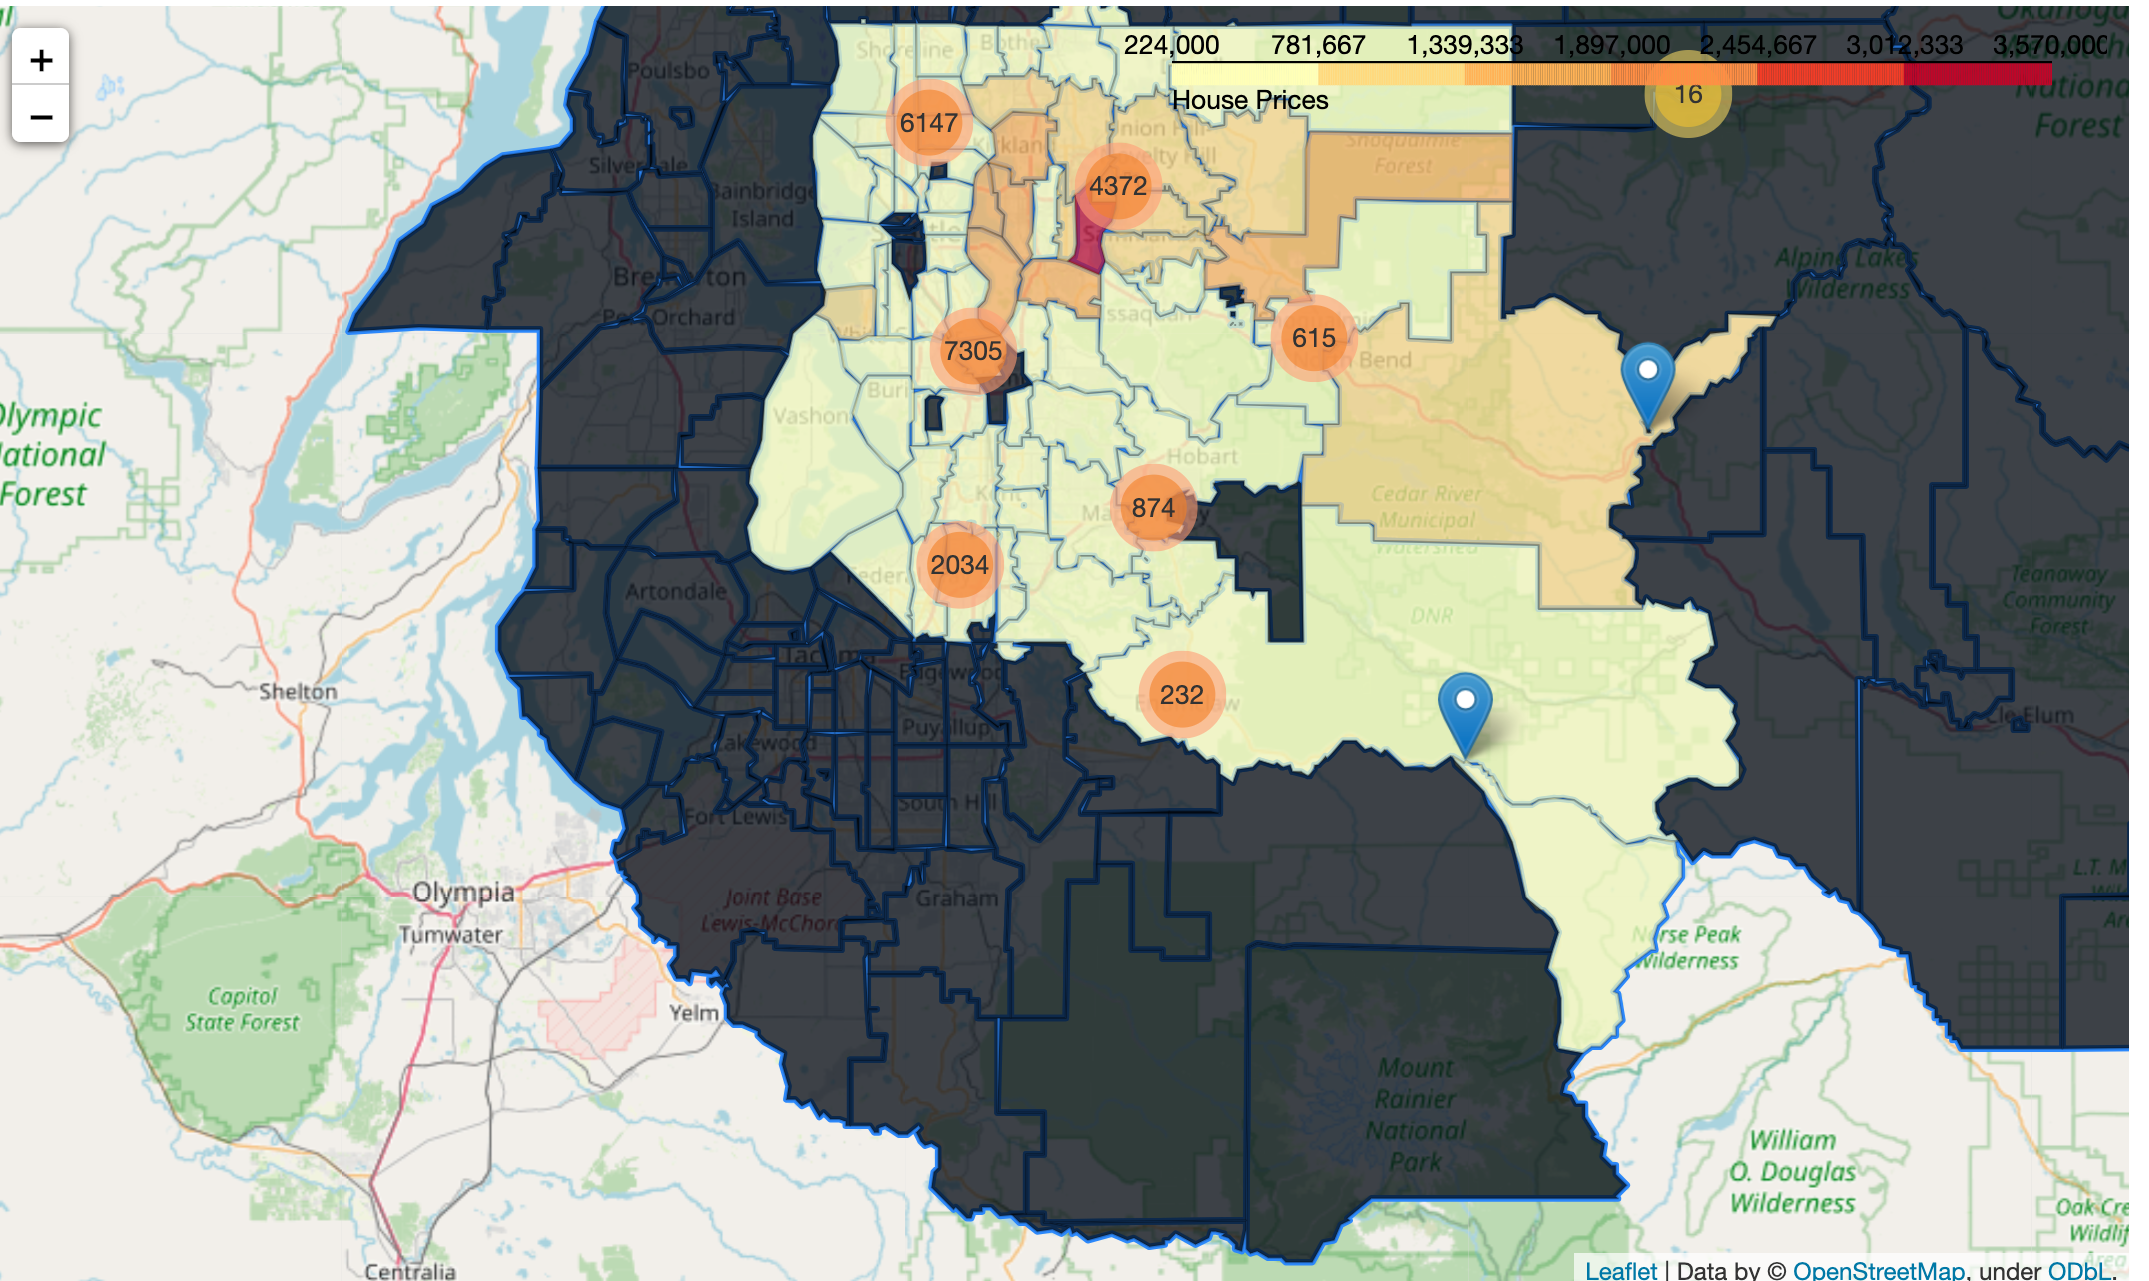